In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleModels as nrn
import os
import pickle as pkl
from tqdm import tqdm

In [14]:
fdir = './data/w_pfc/'
# target_seeds = [1000, 2000, 3000, 4000, 6000, 7000, 8000, 9000, 9900]
target_seeds = []
for i in range(10):
    for j in range(2):
        target_seeds.append((i+1)*1000 + j*10)

In [15]:
def getFFT(x, idt):
    fx = np.fft.fft(x[idt]) / sum(idt)
    f = np.fft.fftfreq(sum(idt), nrn._dt/(1e3))
    fx = abs(fx[:int(sum(idt)//2)])
    f = f[:int(sum(idt)//2)]
    return f, fx

def find_peak(x, f, idf=None):
    if idf is None:
        idf = np.ones(len(x), dtype=bool)
    ind = np.where(x == max(x[idf]))[0][0]
    return f[ind]

label_font_props = {'fontname': 'Helvetica', 'fontsize': 12}
tick_font_props = {'fontname': 'Helvetica', 'fontsize': 8}

In [16]:
nrn.set_times(tmax=500, dt=0.01)

In [ ]:
nn = 20

idt = (nrn._times>50) & (nrn._times<200)
fpeaks = np.zeros([nn, nn, len(target_seeds)])
vffts = []

for i in range(nn):
    vffts.append([])
    for j in tqdm(range(nn)):
        vffts[-1].append([])
        for k, seed in enumerate(target_seeds):
            fname = '%d_ntk_calc_vals_%d_%d.pickle'%(seed, i, j)
            with open(fdir+fname, 'rb') as f:
                vs = pkl.load(f)
            # fourier transform
            v_avg = np.average(vs, axis=1)
            f, vfft = getFFT(v_avg, idt)
            vfft = vfft[f > 1]
            # save data
            vffts[-1][-1].append(vfft)
            fpeaks[i][j][k] = find_peak(vfft, f[f > 1])


 25%|██▌       | 5/20 [00:58<02:56, 11.75s/it]

In [ ]:
gbar_pfc_exc = np.linspace(0, 0.001, nn)
gbar_pfc_inh = np.linspace(0, 0.001, nn)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


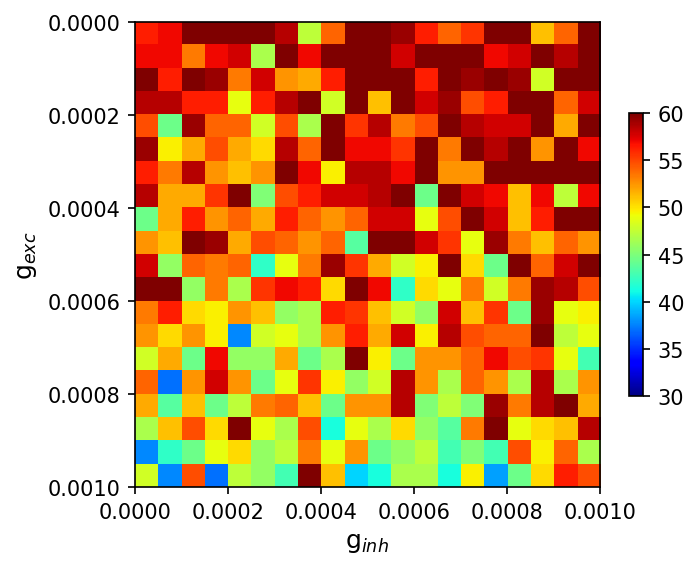

In [120]:
plt.figure(dpi=150, figsize=(5, 5))
plt.imshow(np.average(fpeaks, axis=2), cmap='jet', extent=(gbar_pfc_inh[0], gbar_pfc_inh[-1], gbar_pfc_exc[-1], gbar_pfc_exc[0]),
          vmin=30, vmax=60)
plt.colorbar(shrink=0.5)

plt.xlabel(r'g$_{inh}$', **label_font_props)
plt.ylabel(r'g$_{exc}$', **label_font_props)

# plt.xticks([0,0.0005,0.001], [0, 0.5, 1], **tick_font_props)
# plt.yticks([0,0.0005,0.001], [0, 0.5, 1], **tick_font_props)

plt.xticks()

plt.show()

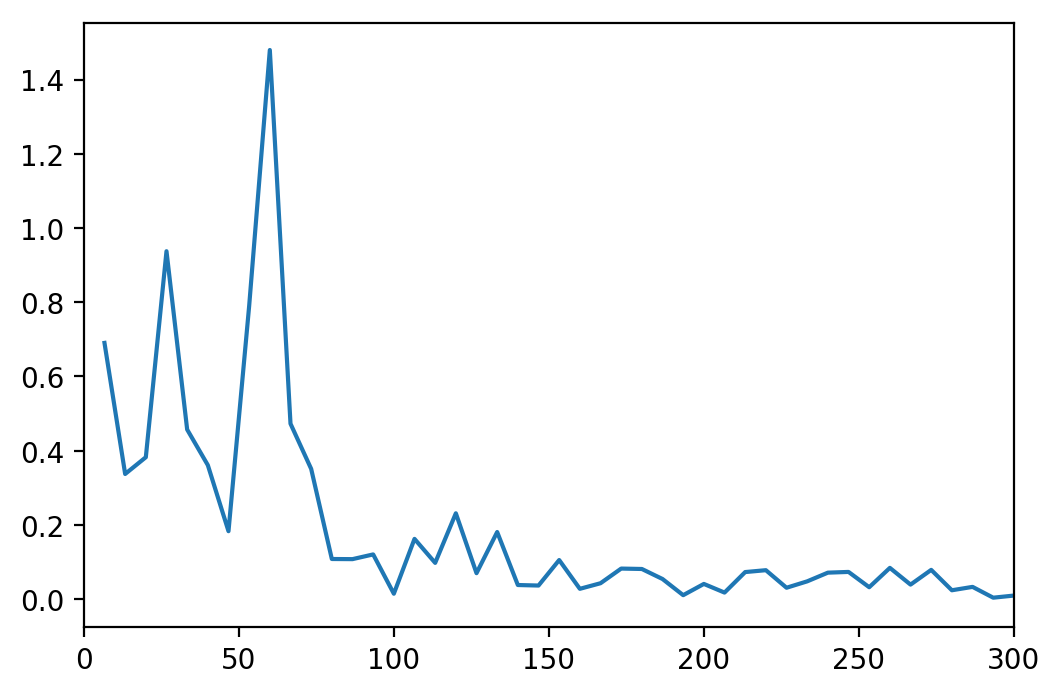

In [60]:
plt.figure(dpi=200)
plt.plot(f[f>1], vffts[0][0])
plt.xlim([0, 300])
plt.show()

In [74]:
f = f[f>1]
nn = 10

In [75]:
map_30 = np.zeros([nn, nn])
map_60 = np.zeros([nn, nn])

for n in range(10):
    for i in range(nn):
        for j in range(nn):
            vfft = vffts[n][10*i+j]
            map_30[i, j] += np.average(vfft[(f>=25)&(f<=35)])
            map_60[i, j] += np.average(vfft[(f>=55)&(f<=65)])

In [79]:
from mpl_toolkits import mplot3d

In [83]:
X, Y = np.meshgrid(gbar_pfc_exc, gbar_pfc_inh)

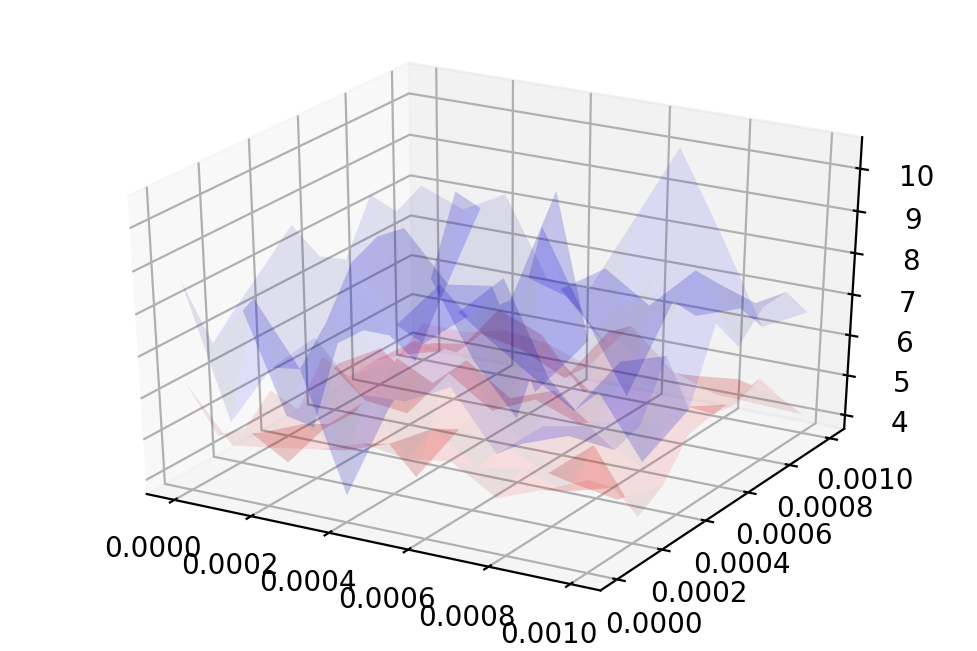

In [94]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, map_30, color='r', alpha=0.1)
ax.plot_surface(X, Y, map_60, color='b', alpha=0.1)
plt.show()

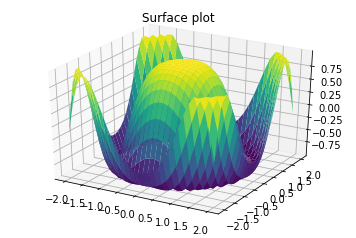

In [80]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()